## 1.  Import Libraries and Supress Warnings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,KFold

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score

from sklearn.decomposition import PCA,IncrementalPCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 3000)
pd.set_option('float_format' , '{:f}'.format)

## 2. Reading and Understanding Data`

### 2.1 Reading Data

In [5]:
user_car_data1 = pd.read_excel('UserCarData.xlsx')
user_car_data1.to_csv('UserCarData.csv', encoding='latin-1')
user_car_data1.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500.000000,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.000000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000.000000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000.000000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000.000000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y


### 2.2 Inspecting the Merged Dataset

In [6]:
user_car_data1.shape

(7906, 18)

In [7]:
user_car_data1.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven            float64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage               object
engine                object
max_power             object
torque                object
seats                  int64
sold                  object
dtype: object

In [8]:
# To suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
user_car_data1.describe(include = "all")

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
count,7906.00000,7906,7906.00000,7906.00000,7904.00000,7906,7906,7906,7906,7905,7906,7905,7904,7906,7904,7906,7906.00000,7906
unique,NaN,1982,NaN,NaN,NaN,4,49,1310,4,3,2,5,393,121,320,441,NaN,2
top,NaN,Maruti Swift Dzire VDI,NaN,NaN,NaN,Central,California,New York City,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN,N
freq,NaN,129,NaN,NaN,NaN,2376,901,196,4299,6563,6865,5215,225,1017,377,530,NaN,5906
mean,4070.10625,NaN,2013.98394,649813.72084,69176.43522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.41639,NaN
std,2345.77016,NaN,3.86370,813582.74835,56793.59869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.95921,NaN
min,1.00000,NaN,1994.00000,29999.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,NaN
25%,2037.25000,NaN,2012.00000,270000.00000,34875.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,NaN
50%,4076.50000,NaN,2015.00000,450000.00000,60000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,NaN
75%,6102.00000,NaN,2017.00000,690000.00000,95050.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00000,NaN


### 2.3 Checking the Sold Percentage in the Data Frame

In [10]:
user_car_data_percentage=user_car_data1[['sold','selling_price']].groupby('sold').count().reset_index()
user_car_data_percentage.columns=['sold','count']
user_car_data_percentage['percentage']=round((user_car_data_percentage['count']/user_car_data_percentage['count'].sum())*100,2)
user_car_data_percentage

,sold,count,percentage
0,N,5906,74.70000
1,Y,2000,25.30000


## 3. Data Cleaning

### 3.1 Creating copy of dataset

In [11]:
user_car_data = user_car_data1.copy()

### 3.2 Formating Column Values

In [12]:
user_car_data['mileage'] = user_car_data['mileage'].str.replace(r'\D', '').astype('float')
user_car_data['engine'] = user_car_data['engine'].str.replace(' CC', '').astype('Int64')
user_car_data['max_power'] = user_car_data['max_power'].str.replace(' bhp', '').astype('float')
user_car_data['km_driven'] = user_car_data['km_driven'].apply(np.round).astype('Int64')
user_car_data['sold'] = user_car_data['sold'].map({'Y': 1, 'N': 0})

### 3.3 Correcting Errors in Column Values 

In [13]:
user_car_data.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              Int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 Int64
max_power            float64
torque                object
seats                  int64
sold                   int64
dtype: object

In [14]:
user_car_data.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,234.00000,1248,74.00000,190Nm@ 2000rpm,5,1
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,2114.00000,1498,103.52000,250Nm@ 1500-2500rpm,5,1
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,177.00000,1497,78.00000,"12.7@ 2,700(kgm@ rpm)",5,1
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,230.00000,1396,90.00000,22.4 kgm at 1750-2750rpm,5,1
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,161.00000,1298,88.20000,"11.5@ 4,500(kgm@ rpm)",5,1


### 3.4 Checking Null Values

In [15]:
mis_val_percent = 100 * user_car_data.isnull().sum() / len(user_car_data)
mis_val_percent

Sales_ID            0.00000
name                0.00000
year                0.00000
selling_price       0.00000
km_driven           0.02530
Region              0.00000
State or Province   0.00000
City                0.00000
fuel                0.00000
seller_type         0.01265
transmission        0.00000
owner               0.01265
mileage             0.02530
engine              0.00000
max_power           0.02530
torque              0.00000
seats               0.00000
sold                0.00000
dtype: float64

In [16]:
missing_values=['km_driven','mileage','max_power']
median_imputation = SimpleImputer(missing_values=np.nan, strategy='median')
user_car_data[missing_values]=median_imputation.fit_transform(user_car_data[missing_values])

In [17]:
print("seller_type: ",user_car_data['seller_type'].value_counts().idxmax()) 
print("owner: ",user_car_data['owner'].value_counts().idxmax()) 

seller_type:  Individual
owner:  First Owner


In [18]:
user_car_data.seller_type = user_car_data.seller_type.fillna('Individual')
user_car_data.owner = user_car_data.owner.fillna('First Owner')

In [19]:
mis_val_percent = 100 * user_car_data.isnull().sum() / len(user_car_data)
mis_val_percent

Sales_ID            0.00000
name                0.00000
year                0.00000
selling_price       0.00000
km_driven           0.00000
Region              0.00000
State or Province   0.00000
City                0.00000
fuel                0.00000
seller_type         0.00000
transmission        0.00000
owner               0.00000
mileage             0.00000
engine              0.00000
max_power           0.00000
torque              0.00000
seats               0.00000
sold                0.00000
dtype: float64

## 4. Checking Value Count in Different columns

In [20]:
user_car_data.name.value_counts()

Maruti Swift Dzire VDI                                    129
Maruti Alto 800 LXI                                        82
Maruti Alto LXi                                            71
BMW X4 M Sport X xDrive20d                                 62
Maruti Swift VDI                                           61
Maruti Wagon R LXI                                         53
Maruti Alto K10 VXI                                        50
Hyundai EON Era Plus                                       48
Maruti Ertiga VDI                                          45
Maruti Wagon R VXI BS IV                                   45
Maruti Alto LX                                             44
Toyota Innova 2.5 VX (Diesel) 7 Seater                     44
Maruti Ritz VDi                                            42
Maruti Swift Dzire VXI                                     38
Tata Safari Storme EX                                      38
Maruti 800 AC                                              38
Maruti B

In [21]:
user_car_data.selling_price.value_counts()

300000      221
600000      211
350000      204
550000      204
450000      194
650000      188
500000      176
250000      173
400000      171
700000      148
750000      143
200000      140
150000      123
800000       92
225000       85
220000       79
625000       75
320000       71
850000       69
950000       66
900000       63
325000       63
120000       62
180000       62
270000       61
280000       55
310000       55
525000       55
425000       54
160000       53
380000       51
229999       50
170000       50
290000       50
275000       49
1000000      49
210000       49
260000       48
480000       48
240000       46
375000       46
2000000      45
100000       45
360000       43
475000       42
570000       42
3200000      42
140000       42
130000       42
190000       41
330000       40
420000       40
430000       39
740000       39
675000       38
110000       38
409999       37
1050000      37
620000       37
390000       37
370000       37
340000       36
645000  

In [22]:
user_car_data.fuel.value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [23]:
user_car_data.seller_type.value_counts()

Individual          6564
Dealer              1106
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [24]:
user_car_data.transmission.value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [25]:
user_car_data.owner.value_counts()

First Owner             5216
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [26]:
user_car_data.year.value_counts()

2017    1010
2016     856
2018     806
2015     775
2013     668
2012     621
2014     620
2019     583
2011     570
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      14
1998       9
1997       9
2001       6
1994       2
1996       2
1995       1
Name: year, dtype: int64

In [27]:
user_car_data.seats.value_counts()

5     6254
7     1120
8      235
4      133
9       80
6       62
10      19
2        2
14       1
Name: seats, dtype: int64

In [28]:
user_car_data.Region.value_counts()

Central    2376
West       1976
East       1939
South      1615
Name: Region, dtype: int64

In [29]:
user_car_data.City.value_counts()

New York City          196
Los Angeles            191
Seattle                 92
Chicago                 88
Boston                  75
Washington              68
Philadelphia            57
Charlotte               45
Miami                   45
Detroit                 42
Atlanta                 39
Houston                 38
Dallas                  36
San Diego               34
Springfield             26
Columbus                25
San Francisco           21
Mount Vernon            21
Richmond                20
Durango                 20
Sanford                 20
Burlington              20
Twentynine Palms        20
Lancaster               19
Danville                19
Prior Lake              18
Auburn                  18
Newark                  17
Bangor                  17
Rochester               17
Albuquerque             17
Troy                    17
Indianapolis            17
Gainesville             17
Boise                   16
Roseville               16
Lakewood                16
C

In [30]:
user_car_data['State or Province'].value_counts()

California              901
Texas                   499
New York                491
Illinois                489
Florida                 425
Ohio                    321
Michigan                305
Washington              295
Pennsylvania            235
North Carolina          222
Indiana                 213
Massachusetts           191
Georgia                 187
Minnesota               169
Virginia                167
Colorado                154
New Jersey              154
Maryland                144
Missouri                141
Tennessee               135
Utah                    133
Oregon                  129
Iowa                    123
Wisconsin               117
Arizona                 115
Kansas                  112
Maine                   110
Arkansas                107
Alabama                 106
Oklahoma                 95
Idaho                    89
South Carolina           81
New Mexico               71
District of Columbia     68
Louisiana                66
Mississippi         

## 5. Checking Outliers

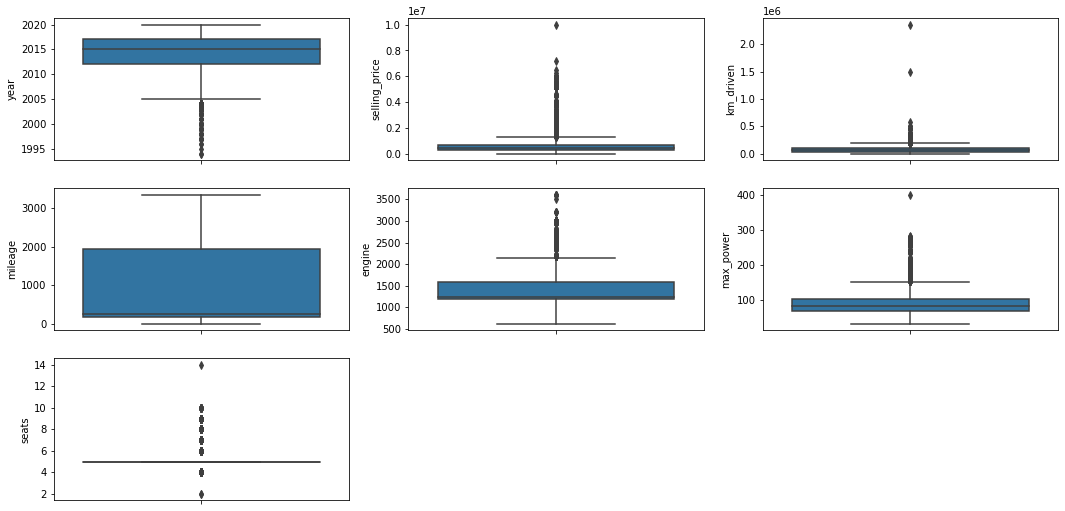

In [31]:
# Plot the box plot to check the outliers in the dataset
num_col = ['year','selling_price','km_driven','mileage','engine','max_power','seats']
plt.figure(figsize=(18,12))

i = 1
for col in num_col:
    plt.subplot(4,3,i)
    sns.boxplot(y=col, data=user_car_data)
    i+=1

## 6. Data Imbalance

### 6.1 Checking Data Imbalance using Pie Chart

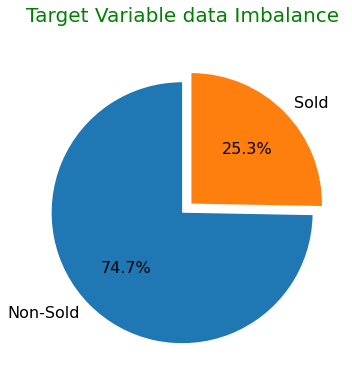

In [32]:
# Plot Imbalance in a Pie Chart
lables = 'Non-Sold','Sold'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(user_car_data['sold'].value_counts(), explode=explode, labels=lables, autopct='%.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Target Variable data Imbalance\n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

### 6.2 Checking the imbalance count

In [33]:
# Check the imbalance of the data

nsold_count = user_car_data[user_car_data['sold'] == 0]['selling_price'].count()
sold_target = user_car_data[user_car_data['sold'] == 1]
non_sold_target = user_car_data[user_car_data['sold'] == 0]
user_car_data['sold'].value_counts()

0    5906
1    2000
Name: sold, dtype: int64

## 7. EDA

### 7.1 Checking Correlation

#### 7.1.1 Visualization of correlations using Heat Maps

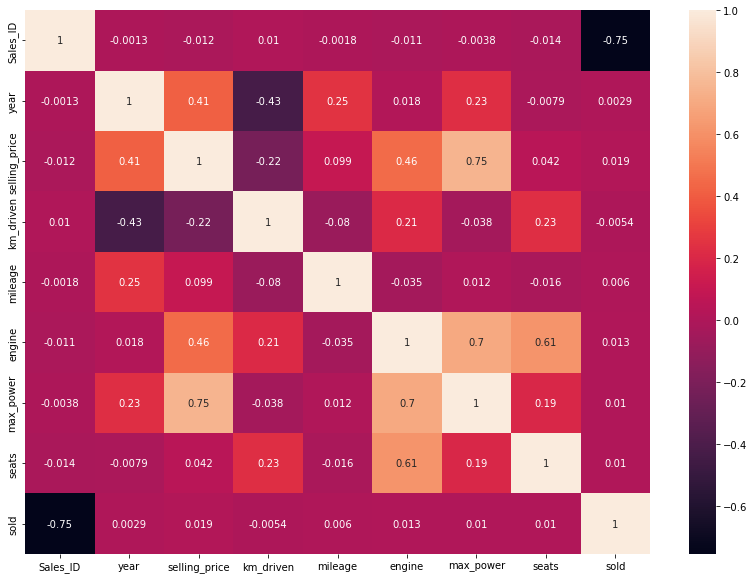

In [34]:
plt.figure(figsize=(14, 10))
sns.heatmap(user_car_data.corr(),annot=True)
plt.show()

***Analysis :-***

- It can be seen that Sales_ID is highly correlated we can remove this correlated column.

#### 7.1.2 Checking highly correlated variable

In [35]:
# columns pairs in order of highest absolute correlation
user_car_data.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

Sales_ID       Sales_ID        1.00000
sold           Sales_ID        0.75387
max_power      selling_price   0.74968
engine         max_power       0.70397
               seats           0.61110
selling_price  engine          0.45568
year           km_driven       0.42852
               selling_price   0.41230
               mileage         0.24791
km_driven      seats           0.22739
max_power      year            0.22662
selling_price  km_driven       0.22212
dtype: float64

#### 7.1.3. Removing highly correlated variable

In [36]:
user_car_data_new = user_car_data.drop(['Sales_ID'], axis=1)
user_car_data_new.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,Maruti Swift Dzire VDI,2014,450000,145500.00000,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,234.00000,1248,74.00000,190Nm@ 2000rpm,5,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.00000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,2114.00000,1498,103.52000,250Nm@ 1500-2500rpm,5,1
2,Honda City 2017-2020 EXi,2006,158000,140000.00000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,177.00000,1497,78.00000,"12.7@ 2,700(kgm@ rpm)",5,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000.00000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,230.00000,1396,90.00000,22.4 kgm at 1750-2750rpm,5,1
4,Maruti Swift VXI BSIII,2007,130000,120000.00000,East,New York,New York City,Petrol,Individual,Manual,First Owner,161.00000,1298,88.20000,"11.5@ 4,500(kgm@ rpm)",5,1


In [37]:
user_car_data_new.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

### 7.2 Univariate Analysis

In [38]:
 ##### 7.2.1 Univariate Analysis of Numerical Columns

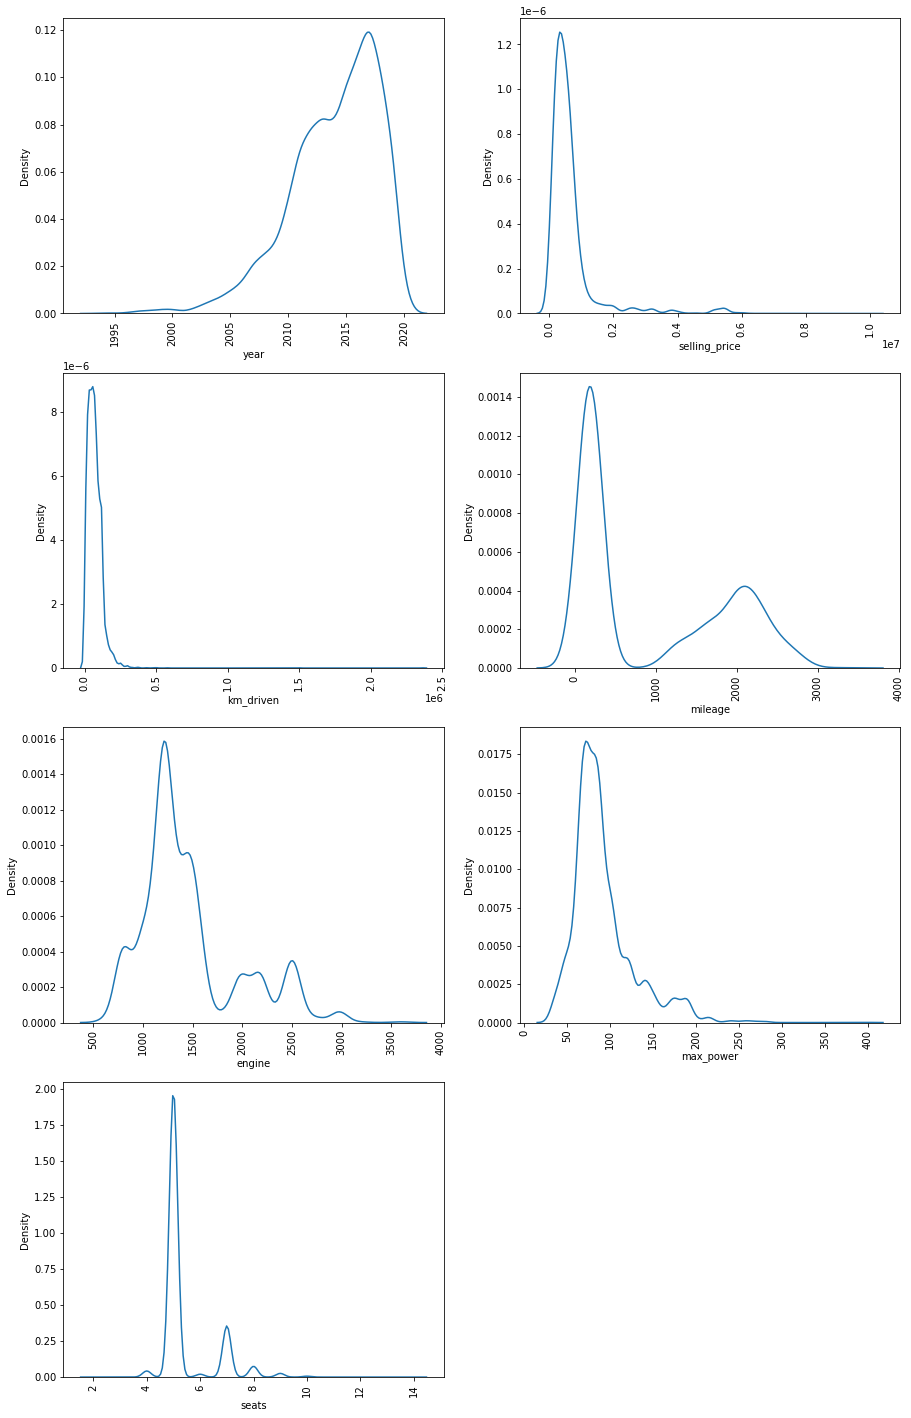

In [39]:
# Plotting dist plot for numerical columns
num_col = ['year','selling_price','km_driven','mileage','engine','max_power','seats']
plt.figure(figsize = (15,25))
i = 1
for col in num_col:
    plt.subplot(4,2,i)
    sns.distplot(user_car_data_new[col],hist=False)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

***Analysis:-***

***We can infer below points from above univariate analysis***
- The most cars are of the year 2017.
- The selling price of the most of the cars deal lie between 0 - 5000.
- The maximum km driven by cars is between 0.0 - 0.2.
- The mileage of the most of the cars deal lie between 0 - 5000.
- The maximum engine of the most of the cars is 1300.
- The maximum power of the most of the cars is 100.
- The most of the cars has a seating capacity of 5.


 ##### 7.2.2 Univariate Analysis of Categorical Columns

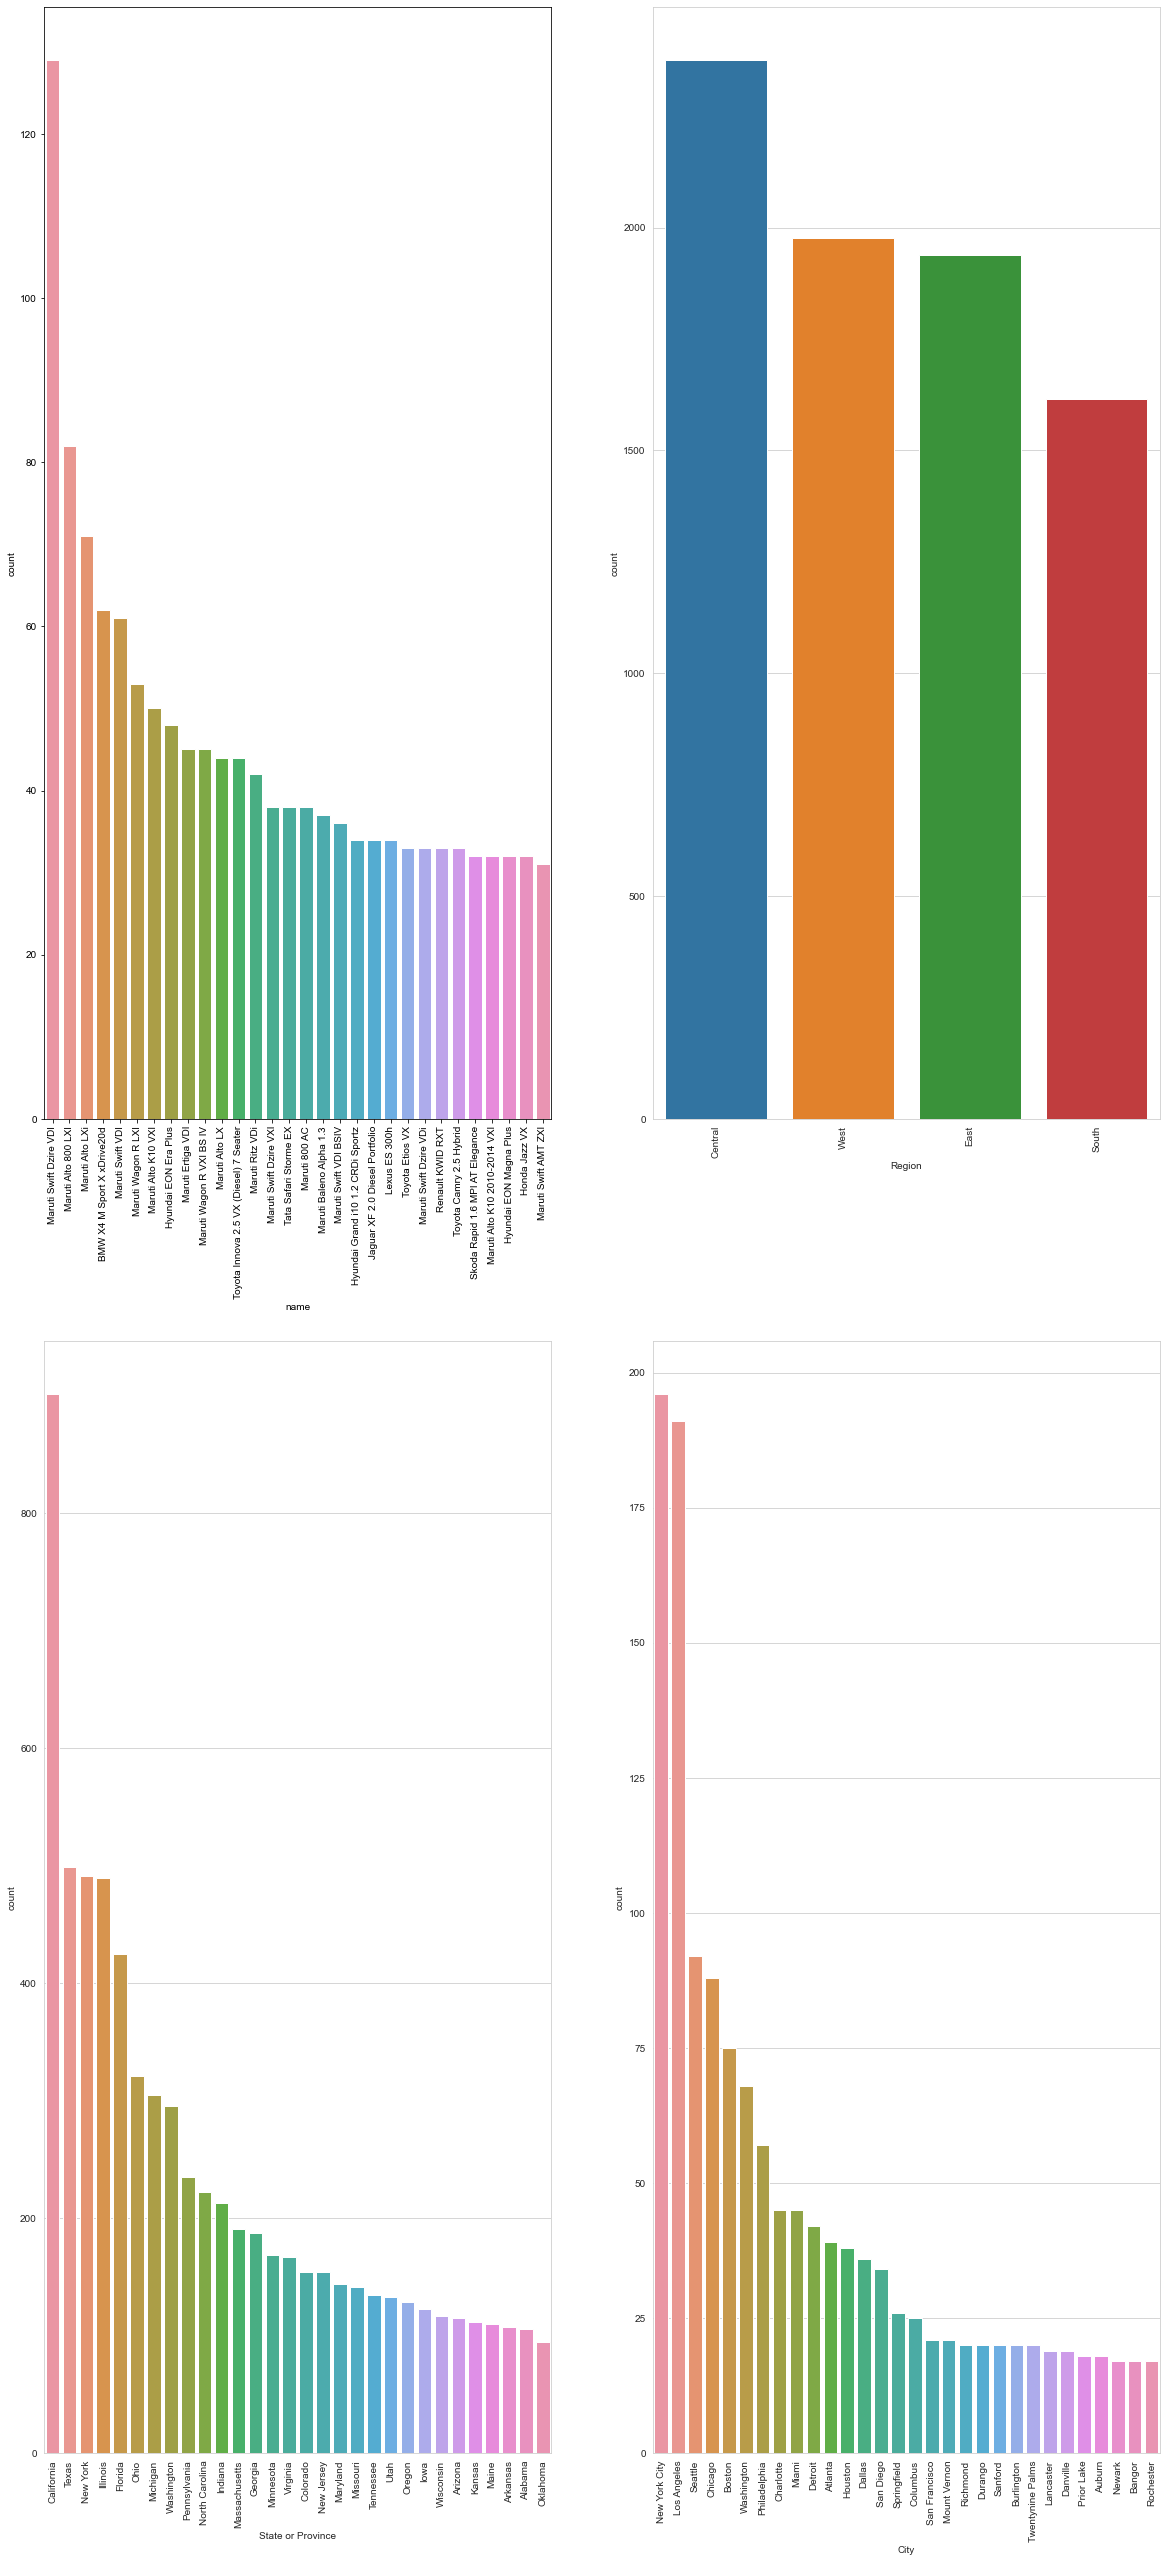

In [40]:
# Plotting box plot for categorical columns
catg_var0 = ['name', 'Region','State or Province', 'City'] 
plt.figure(figsize = (20,45))
i = 1
for c in catg_var0:
    plt.subplot(2,2,i)
    sns.set_style("whitegrid")
    sns.countplot((user_car_data_new[c]), order=user_car_data_new[c].value_counts().iloc[:30].index)
    plt.xticks(rotation = 90)
    i += 1
plt.show();

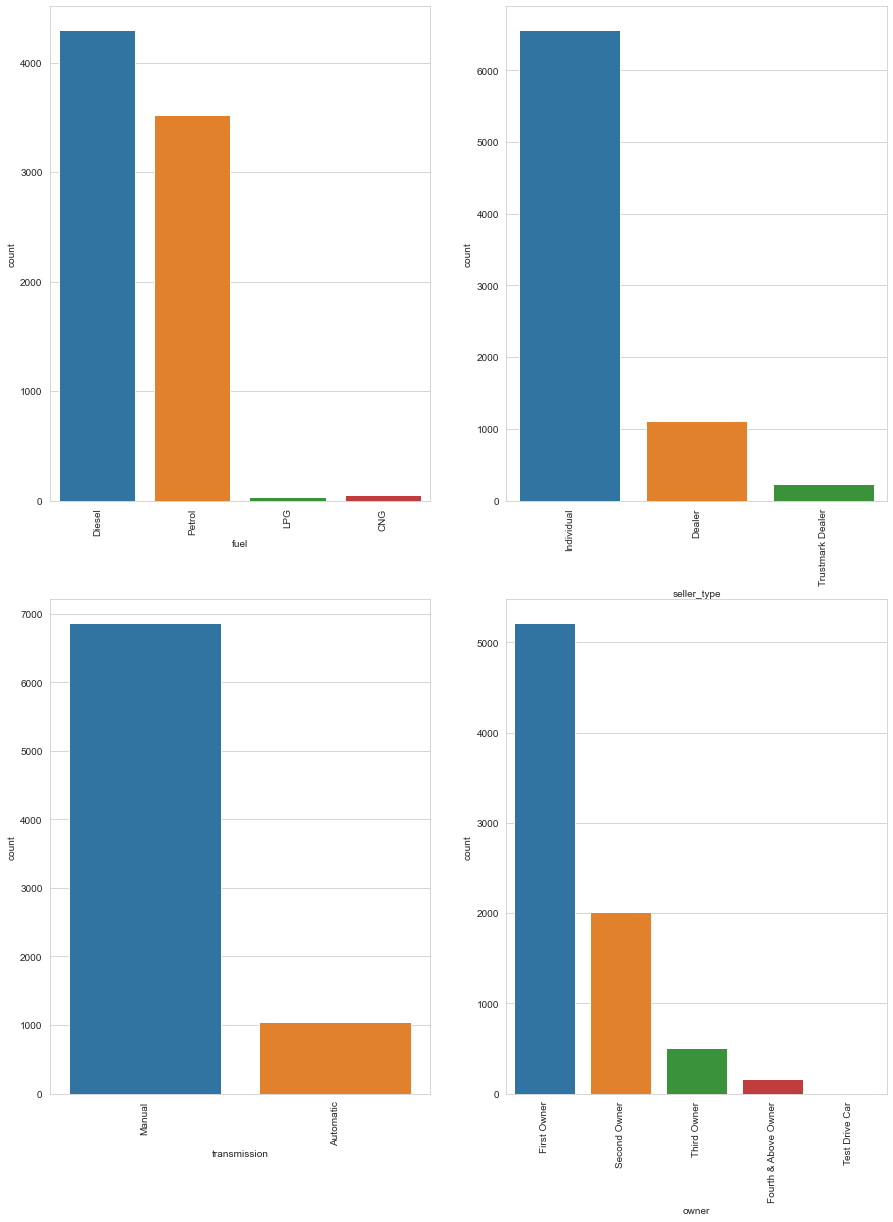

In [41]:
catg_var1 = ['fuel', 'seller_type', 'transmission','owner']
plt.figure(figsize = (15,20))
i = 1
for c in catg_var1:
    plt.subplot(2,2,i)
    sns.set_style("whitegrid")
    sns.countplot(user_car_data_new[c])
    plt.xticks(rotation = 90)
    i += 1
plt.show();

***Analysis:-***

***We can infer below points from above univariate analysis***
- The Maruti Swift Dzire VDI has the maximum count whereas Maruti Swift AMT ZXI have least count.
- The Central Region has most number of cars and South Region has least number of cars.
- The maximum are from California state and Oklahama has least number of cars.
- The New York and Los Angeles city has maximum number of cars whereas Newark,Bangor and Rochester have least number of cars.
- The maximum car run on Disel fuel.
- The indiviual seller is selling most of car.
- The car with manual transmission are most prefered
- The most of the cars are from First Owner.

### 7.3 Bivariate Analysis

##### 7.3.1 Bivariate Analysis of Numerical Columns

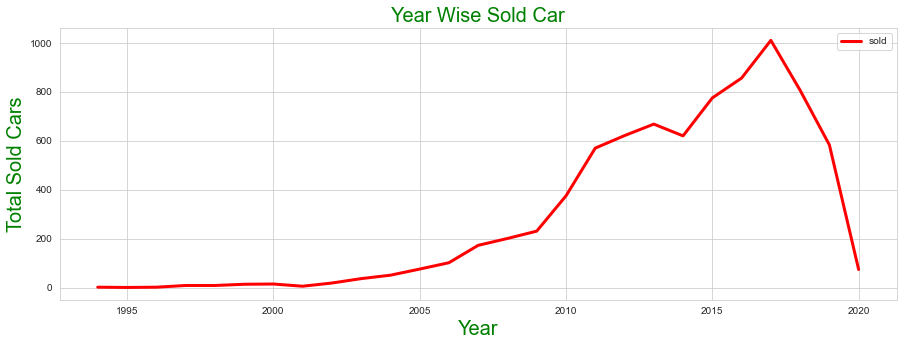

In [42]:
user_car_data_new.groupby('year')['sold'].count().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'red',legend=True)
plt.title('Year Wise Sold Car' ,fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Year", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Sold Cars", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

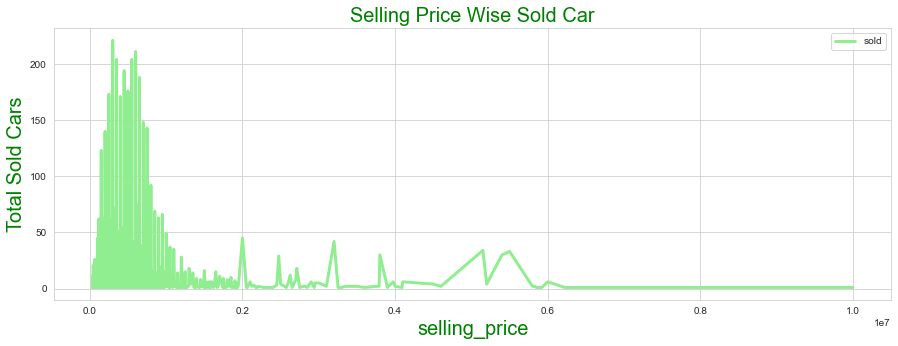

In [43]:
user_car_data_new.groupby('selling_price')['sold'].count().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                color = 'lightgreen',legend=True)

plt.title('Selling Price Wise Sold Car' ,fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("selling_price", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Sold Cars", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

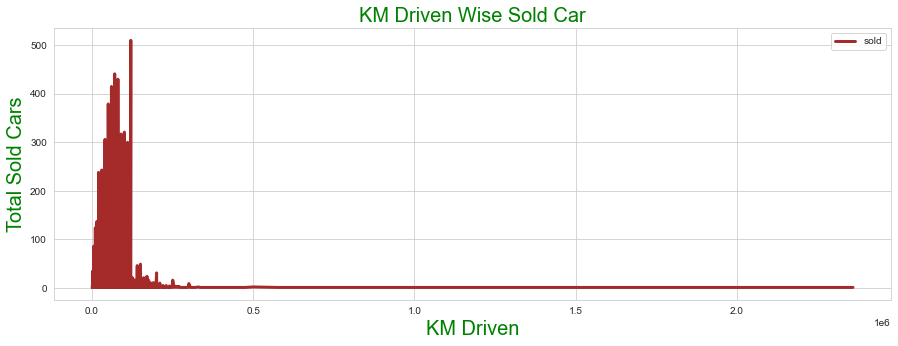

In [44]:
user_car_data_new.groupby('km_driven')['sold'].count().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'brown',legend=True)
plt.title('KM Driven Wise Sold Car' ,fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("KM Driven", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Sold Cars", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

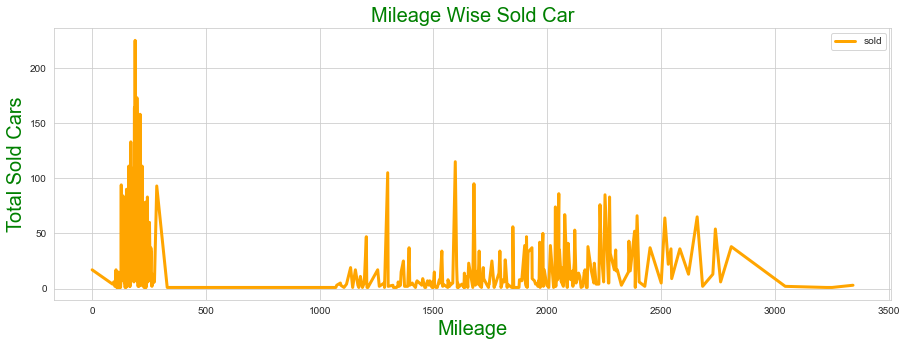

In [45]:
user_car_data_new.groupby('mileage')['sold'].count().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'orange',legend=True)
plt.title('Mileage Wise Sold Car' ,fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Mileage", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Sold Cars", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

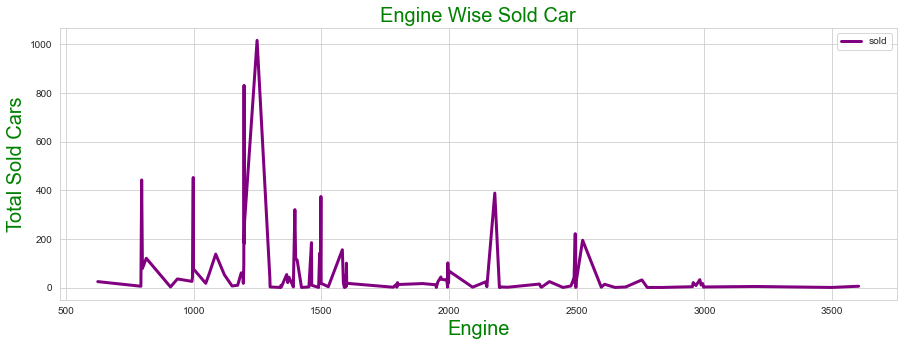

In [46]:
user_car_data_new.groupby('engine')['sold'].count().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'purple',legend=True)
plt.title('Engine Wise Sold Car' ,fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Engine", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Sold Cars", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

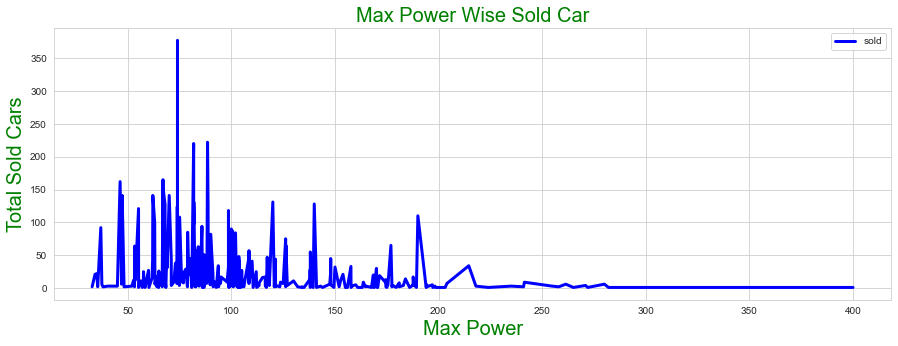

In [47]:
user_car_data_new.groupby('max_power')['sold'].count().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'blue',legend=True)
plt.title('Max Power Wise Sold Car' ,fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Max Power", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Sold Cars", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

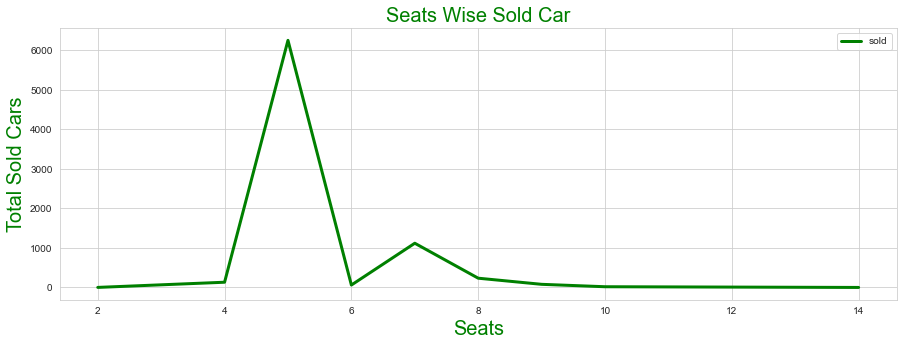

In [48]:
user_car_data_new.groupby('seats')['sold'].count().plot(kind = 'line', linewidth = 3, 
                                                                        figsize =(15,5),color = 'green',legend=True)
plt.title('Seats Wise Sold Car' ,fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Seats", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Sold Cars", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

***Analysis:-***

***We can infer below points from above bivariate analysis***
- The maximum cars are sold of the year 2017.
- The maximum cars sold have the selling price between 0 - 0.1.
- The most of the sold cars are very less km driven between 0 - 0.3.
- The mileage of most of the sold cars is arround 300
- The cars with the engine of 1400 are the most sold cars.
- The cars having power of 70 are sold most.
- The 5 seater car is most selling car

##### 7.3.2 Bivariate Analysis of Categorical Columns

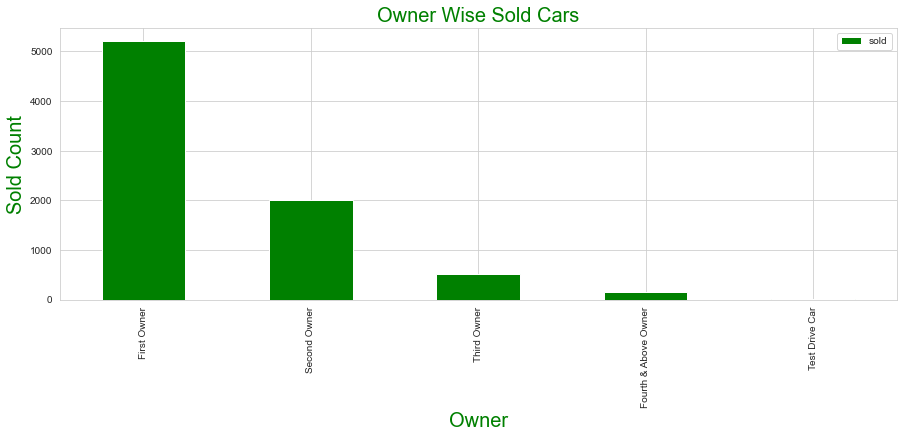

In [49]:
user_car_data_new.groupby(['owner'])['sold'].count().sort_values(ascending = False).plot(kind='bar',
                                                                                figsize=(15,5),color = 'green',legend=True)

plt.title('Owner Wise Sold Cars',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Owner", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Sold Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

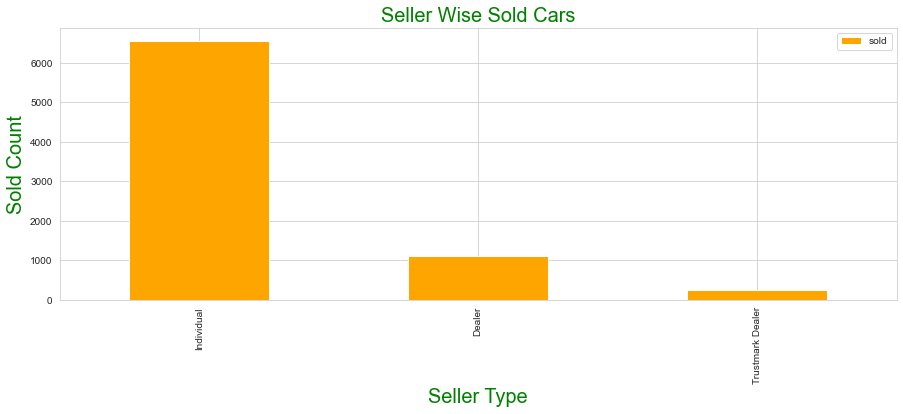

In [50]:
user_car_data_new.groupby(['seller_type'])['sold'].count().sort_values(ascending = False).plot(kind='bar',
                                                                                figsize=(15,5),color = 'orange',legend=True)

plt.title('Seller Wise Sold Cars',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Seller Type", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Sold Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

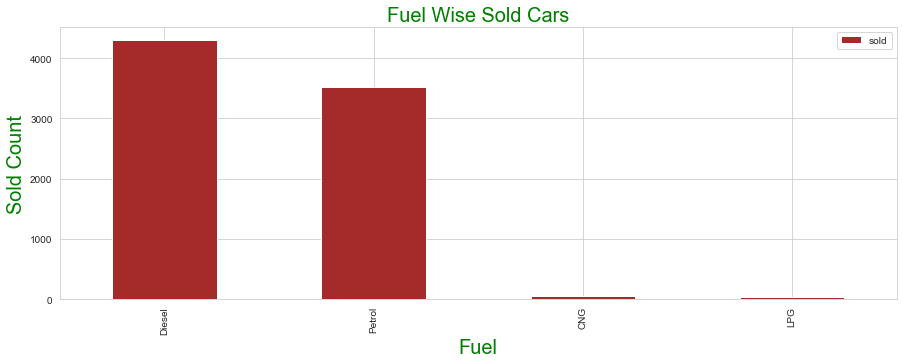

In [51]:
user_car_data_new.groupby(['fuel'])['sold'].count().sort_values(ascending = False).plot(kind='bar',
                                                                                figsize=(15,5),color = 'brown',legend=True)

plt.title('Fuel Wise Sold Cars',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Fuel", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Sold Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

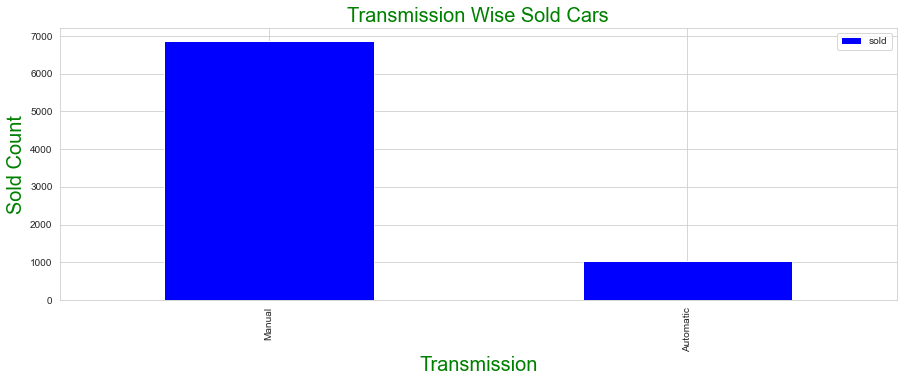

In [52]:
user_car_data_new.groupby(['transmission'])['sold'].count().sort_values(ascending = False).plot(kind='bar',
                                                                                figsize=(15,5),color = 'blue',legend=True)

plt.title('Transmission Wise Sold Cars',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Transmission", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Sold Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

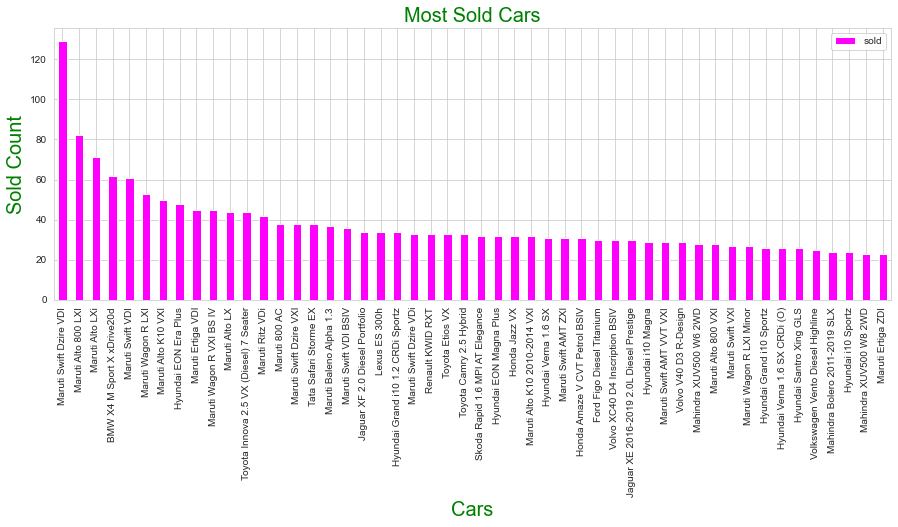

In [53]:
user_car_data_new.groupby(['name'])['sold'].count().sort_values(ascending = False)[:50].plot(kind='bar',
                                                                                figsize=(15,5),color = 'magenta',legend=True)

plt.title('Most Sold Cars',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Cars", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Sold Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

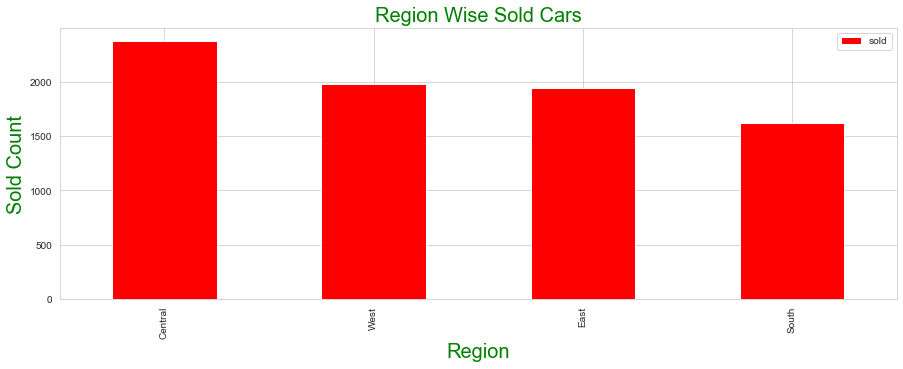

In [54]:
user_car_data_new.groupby(['Region'])['sold'].count().sort_values(ascending = False).plot(kind='bar',
                                                                                figsize=(15,5),color = 'red',legend=True)

plt.title('Region Wise Sold Cars',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Region", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Sold Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

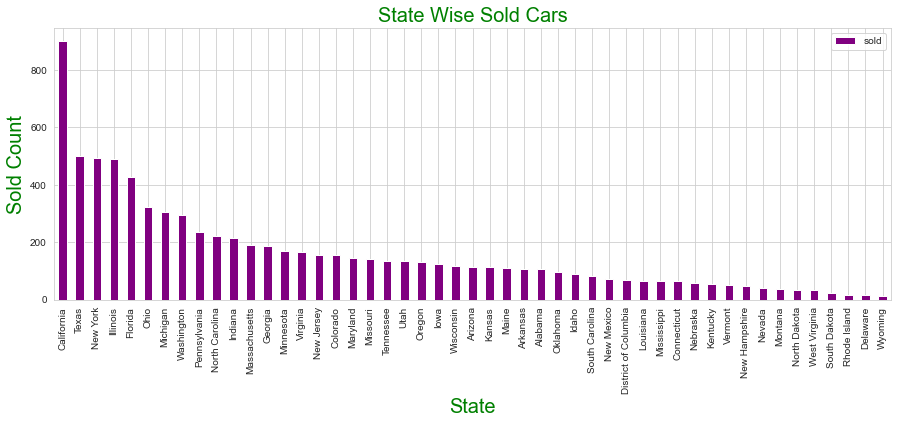

In [55]:
user_car_data_new.groupby(['State or Province'])['sold'].count().sort_values(ascending = False)[:50].plot(kind='bar',
                                                                                figsize=(15,5),color = 'purple',legend=True)

plt.title('State Wise Sold Cars',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("State", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Sold Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

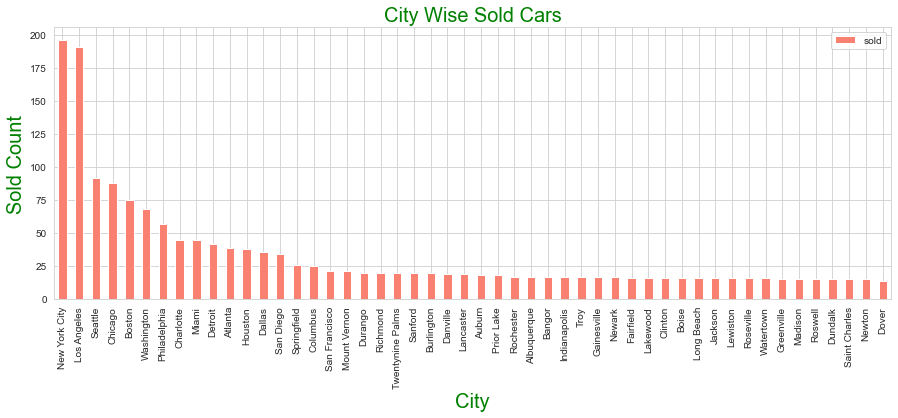

In [56]:
user_car_data_new.groupby(['City'])['sold'].count().sort_values(ascending = False)[:50].plot(kind='bar',
                                                                                figsize=(15,5),color = '#FA8072',legend=True)

plt.title('City Wise Sold Cars',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("City", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Sold Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

***Analysis:-***

***We can infer below points from above bivariate analysis***
- The most of the people prefer to buy car from the First Owner.
- The people prefer to buy car directly from the indivual.
- Disel is most sold car whereas CNG and LPG are least sold cars
- The maximum sold cars are having Manual Transmission.
- The Maruti Swift Dzire VDI is top selling car and Maruti Ertiga ZDI, Mahindra XUV500 W8 2WD are least selling cars.
- The Central Region is contributing maximum is selling cars and South Region is least contribting.
- The people from California state are buying maximum cars whereas people Rhode Island,Delaware,Wyoming are buying less cars.
- The New York City,Loss Angles are giving maximum sales whereas Saint Charles,Newton,Dower are giving least sales.

## 8. Dummy Variables

In [57]:
user_car_data_new.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,Maruti Swift Dzire VDI,2014,450000,145500.00000,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,234.00000,1248,74.00000,190Nm@ 2000rpm,5,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.00000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,2114.00000,1498,103.52000,250Nm@ 1500-2500rpm,5,1
2,Honda City 2017-2020 EXi,2006,158000,140000.00000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,177.00000,1497,78.00000,"12.7@ 2,700(kgm@ rpm)",5,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000.00000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,230.00000,1396,90.00000,22.4 kgm at 1750-2750rpm,5,1
4,Maruti Swift VXI BSIII,2007,130000,120000.00000,East,New York,New York City,Petrol,Individual,Manual,First Owner,161.00000,1298,88.20000,"11.5@ 4,500(kgm@ rpm)",5,1


### 8.1 Creation of Dummy Variables

In [58]:
cars_categorical = user_car_data_new[['fuel', 'seller_type', 'transmission','owner']]
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)

### 8.2 Concatinating the dummy and non-dummy dataset

In [59]:
# drop categorical variables 
user_car_data_new_dummies = user_car_data_new.drop(list(cars_categorical.columns), axis=1)
# concat dummy variables with X
user_car_data_new_dummies = pd.concat([user_car_data_new_dummies, cars_dummies], axis=1)

In [60]:
user_car_data_new_dummies.head()

,name,year,selling_price,km_driven,Region,State or Province,City,mileage,engine,max_power,torque,seats,sold,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500.00000,East,District of Columbia,Washington,234.00000,1248,74.00000,190Nm@ 2000rpm,5,1,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.00000,East,New York,New York City,2114.00000,1498,103.52000,250Nm@ 1500-2500rpm,5,1,1,0,0,1,0,1,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000.00000,Central,Illinois,Chicago,177.00000,1497,78.00000,"12.7@ 2,700(kgm@ rpm)",5,1,0,0,1,1,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000.00000,Central,Illinois,Chicago,230.00000,1396,90.00000,22.4 kgm at 1750-2750rpm,5,1,1,0,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000.00000,East,New York,New York City,161.00000,1298,88.20000,"11.5@ 4,500(kgm@ rpm)",5,1,0,0,1,1,0,1,0,0,0,0


In [61]:
user_car_data_final = user_car_data_new_dummies.copy()

### 8.4 Dropping the unecessary column from the Dummy Dataset

In [62]:
user_car_data_final.drop(['Region','State or Province', 'City','torque','name'],
                        axis=1,inplace=True)

### 8.5 Create a Final Datasest

In [63]:
user_car_data_final.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,sold,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500.00000,234.00000,1248,74.00000,5,1,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000.00000,2114.00000,1498,103.52000,5,1,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000.00000,177.00000,1497,78.00000,5,1,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000.00000,230.00000,1396,90.00000,5,1,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000.00000,161.00000,1298,88.20000,5,1,0,0,1,1,0,1,0,0,0,0


In [64]:
user_car_data_final.shape

(7906, 18)

## 9. Check the distribution of data

<Figure size 432x288 with 0 Axes>

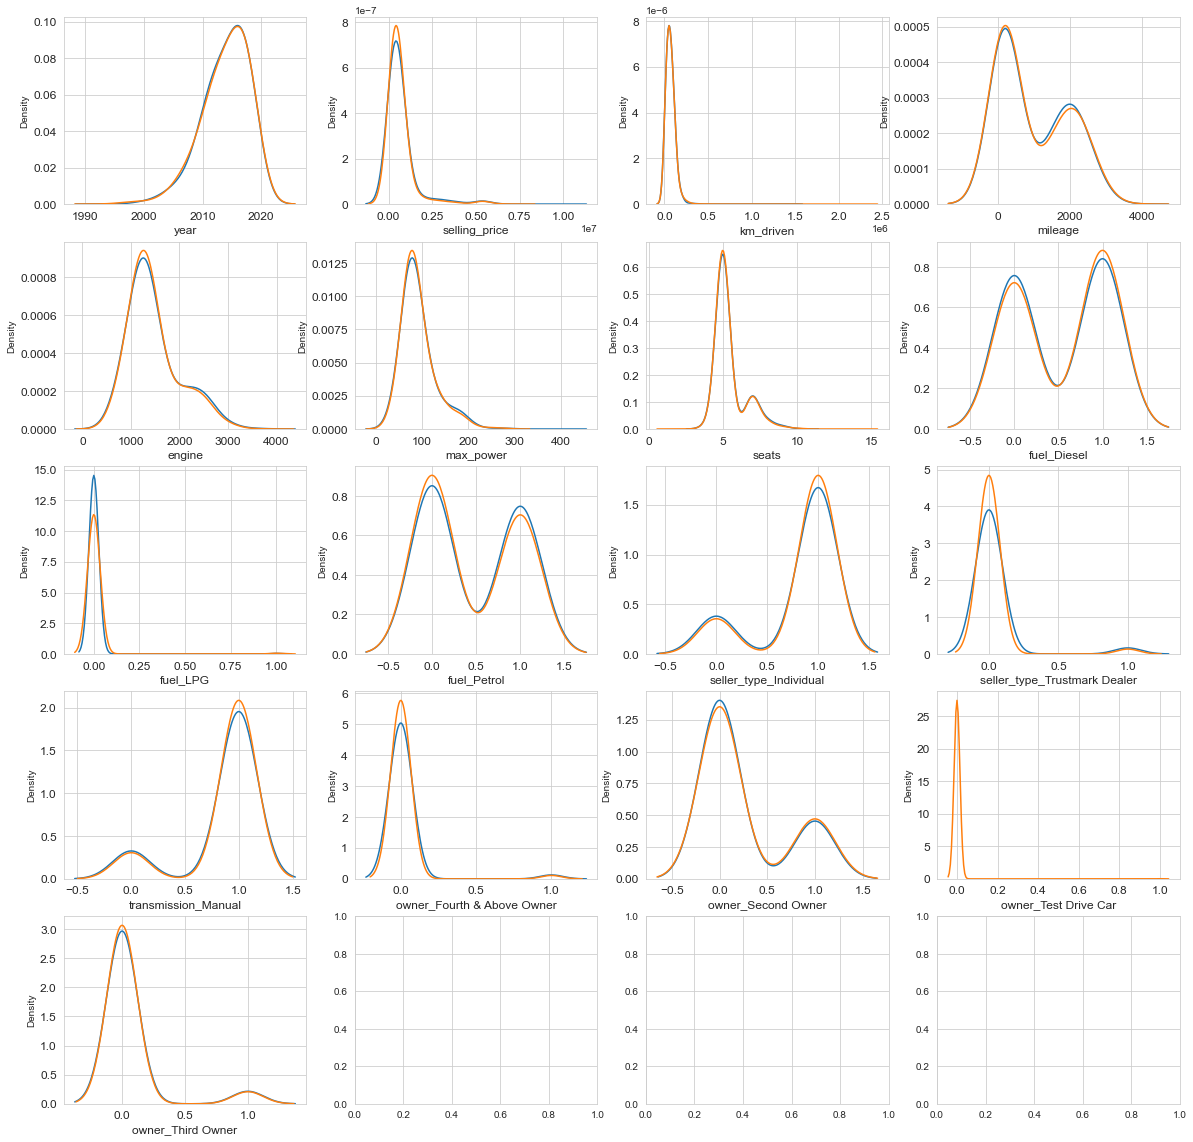

In [65]:
var = list(user_car_data_final.columns.values)
# dropping Class columns from the list
var.remove("sold")

i = 0
sold_target = user_car_data_final.loc[user_car_data_final['sold'] == 1]
non_sold_target = user_car_data_final.loc[user_car_data_final['sold'] == 0]

plt.figure()
fig, ax = plt.subplots(5,4,figsize=(20,20))

for feature in var:
    i += 1
    plt.subplot(5,4,i)
    sns.kdeplot(sold_target[feature], bw=0.5,label="1")
    sns.kdeplot(non_sold_target[feature], bw=0.5,label="0")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

## 10. Balancing the Data

### 10.1 Check the Data Imbalance Before Oversampling

In [66]:
# Check the imbalance of the data

nsold_count = user_car_data_final[user_car_data_final['sold'] == 0]['selling_price'].count()
sold_target = user_car_data_final[user_car_data_final['sold'] == 1]
non_sold_target = user_car_data_final[user_car_data_final['sold'] == 0]
user_car_data_final['sold'].value_counts()

0    5906
1    2000
Name: sold, dtype: int64

***Analysis:-***

- We can infer from above that there is huge imbalance in the data

### 10.2 Performing Oversampling to Balance the Data

In [67]:
oversampled_data = sold_target.sample(nsold_count, replace=True)
oversampled = pd.concat([non_sold_target, oversampled_data], axis=0)

### 10.3 Check the Data After Oversampling

In [68]:
oversampled['sold'].value_counts()

0    5906
1    5906
Name: sold, dtype: int64

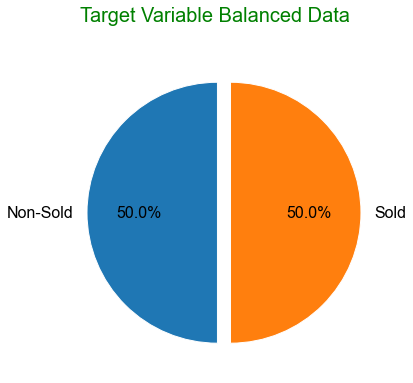

In [69]:
# Plot Imbalance in a Pie Chart
lables = 'Non-Sold','Sold'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Very good')
plt.figure(figsize = [6,6])

plt.pie(oversampled['sold'].value_counts(), explode=explode, labels=lables, autopct='%.1f%%', 
        textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'}, startangle=90)

# Adding and formatting title
plt.title("Target Variable Balanced Data \n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

***Analysis:-***
    
- The data is balanced after performing Oversampling

### 10.4 Balanced Data

In [70]:
oversampled.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,sold,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2000,2014,450000,56000.00000,219.00000,1396,88.76000,5,0,1,0,0,1,0,1,0,0,0,0
2001,2012,1300000,140000.00000,1888.00000,1995,184.00000,5,0,1,0,0,1,0,0,0,1,0,0
2002,2016,351000,60000.00000,231.00000,998,67.04000,5,0,0,0,1,1,0,1,0,0,0,0
2003,2012,550000,130000.00000,151.00000,2179,140.00000,7,0,1,0,0,1,0,1,0,0,0,0
2004,2013,1300000,140000.00000,1888.00000,1995,184.00000,5,0,1,0,0,1,0,0,0,1,0,0


## 11. Perform the Train Test Split

### 11.1 Splitting train and test dataset into X and y

In [71]:
X = oversampled.drop(['sold'],axis=1)
X.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2000,2014,450000,56000.00000,219.00000,1396,88.76000,5,1,0,0,1,0,1,0,0,0,0
2001,2012,1300000,140000.00000,1888.00000,1995,184.00000,5,1,0,0,1,0,0,0,1,0,0
2002,2016,351000,60000.00000,231.00000,998,67.04000,5,0,0,1,1,0,1,0,0,0,0
2003,2012,550000,130000.00000,151.00000,2179,140.00000,7,1,0,0,1,0,1,0,0,0,0
2004,2013,1300000,140000.00000,1888.00000,1995,184.00000,5,1,0,0,1,0,0,0,1,0,0


In [72]:
X.isnull().sum()

year                            0
selling_price                   0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
seats                           0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

In [73]:
y = oversampled['sold']
y.head()

2000    0
2001    0
2002    0
2003    0
2004    0
Name: sold, dtype: int64

### 11.2 Creating Train and Test Data

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

### 11.3 Train Data

In [75]:
X_train.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1987,2015,600000,80000.00000,1358.00000,2499,72.40000,9,1,0,0,1,0,1,0,1,0,0
86,2010,225000,44000.00000,262.00000,998,58.20000,5,0,1,0,0,0,1,0,0,0,0
615,2014,380000,50000.00000,240.00000,1120,70.00000,5,1,0,0,1,0,1,0,1,0,0
1130,2005,90000,40000.00000,197.00000,796,46.30000,5,0,0,1,1,0,1,0,1,0,0
5617,2012,360000,100000.00000,2232.00000,1582,126.32000,5,1,0,0,1,0,1,0,1,0,0


### 11.4 Test Data

In [76]:
X_test.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1642,2017,850000,60000.00000,2277.00000,1498,98.59000,5,1,0,0,1,0,1,0,0,0,0
1351,2016,495000,56832.00000,1987.00000,1461,83.14000,5,1,0,0,0,0,1,0,0,0,0
215,2017,775000,75000.00000,243.00000,1248,88.50000,5,1,0,0,1,0,1,0,0,0,0
4799,2009,360000,60000.00000,150.00000,1396,100.00000,5,0,0,1,1,0,0,0,1,0,0
642,2019,5500000,8500.00000,1678.00000,1995,190.00000,5,1,0,0,0,0,0,0,0,0,0


### 11.5 Checking the Shape of Train and Test Data

In [77]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (8268, 17)
X_test (3544, 17)
y_train (8268,)
y_test (3544,)


## 12. Check the skewnees in the dataset

### 12.1 Plot the histogram of a variable from the dataset to see the skewness

In [78]:
cols = X_train.columns

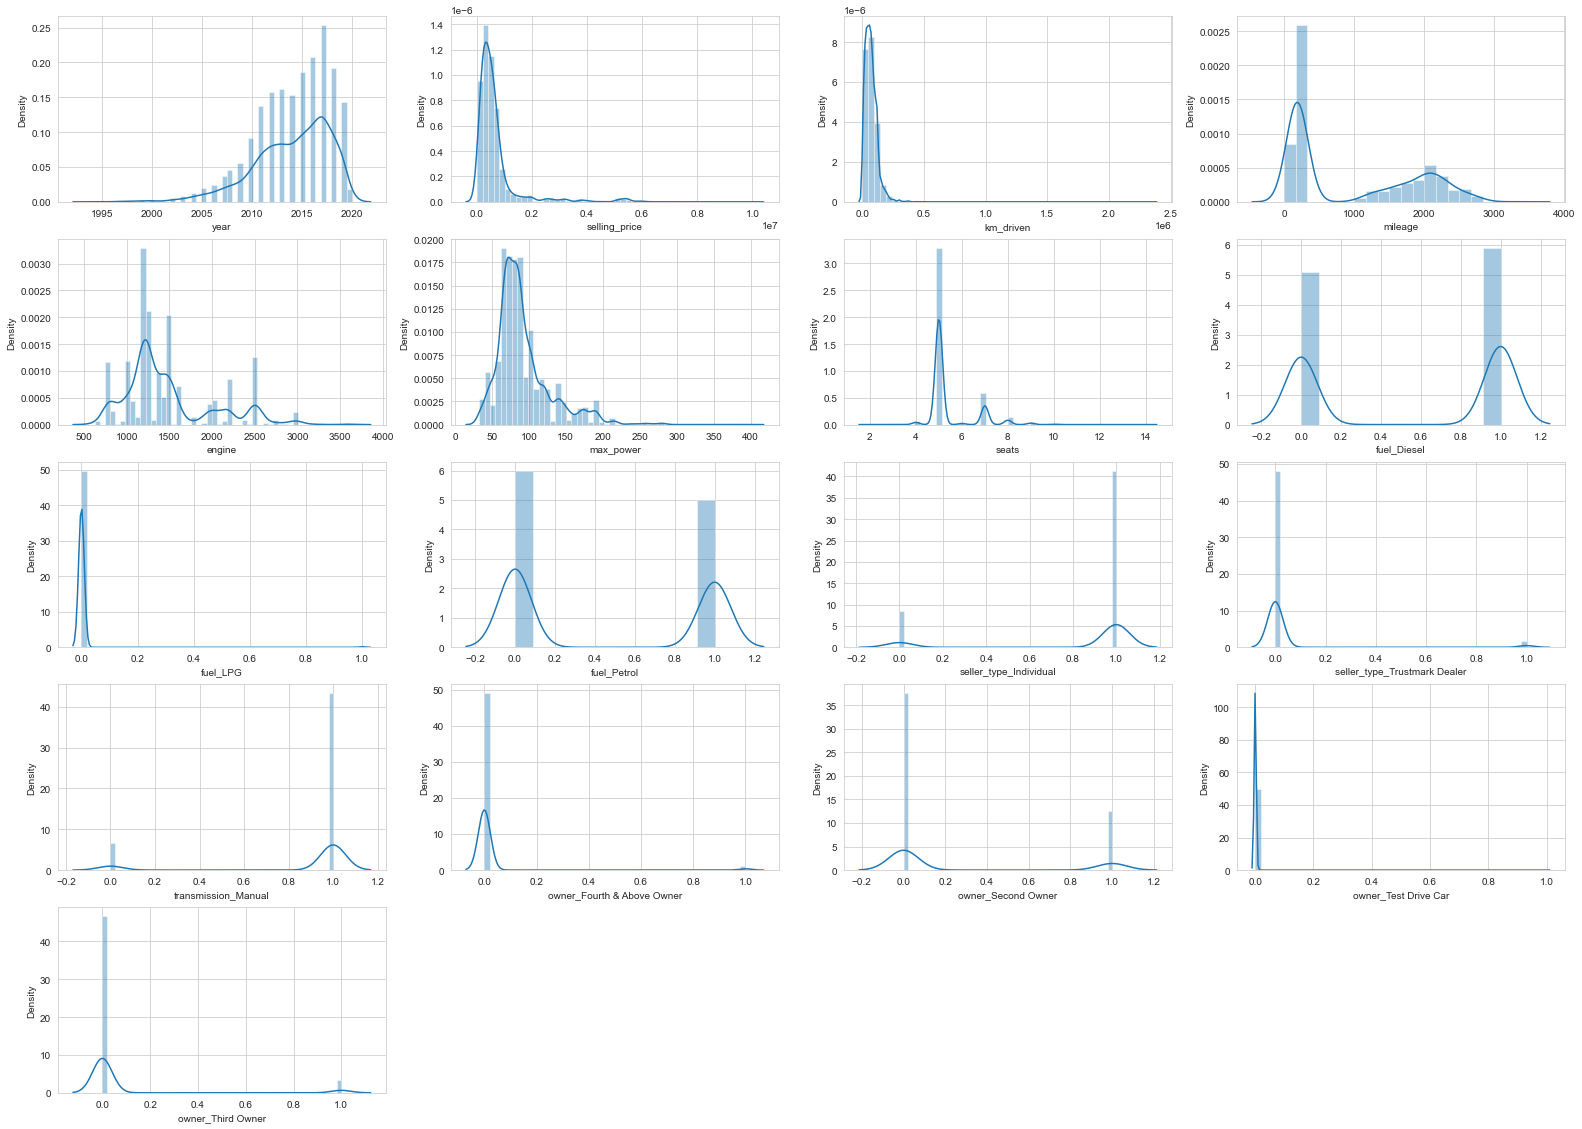

In [79]:
# plot the histogram of a variable from the dataset to see the skewness

plt.figure(figsize=(27,28))
i=0
for col in cols:
    i += 1
    plt.subplot(7,4, i)
    sns.distplot(X_train[col])
plt.show()

***Analysis:-***

- We see that the data is not evenly distributed as there is skewness in the data that will not give good result during model building.


### 12.2 Fixing the skewness in the dateset

In [80]:
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[col] = pt.fit_transform(X_train)

# Transform the test set
X_test[col] = pt.transform(X_test)

### 12.3 Plotting the distribution of the variables (skewness) of all the columns after skewnes treatement

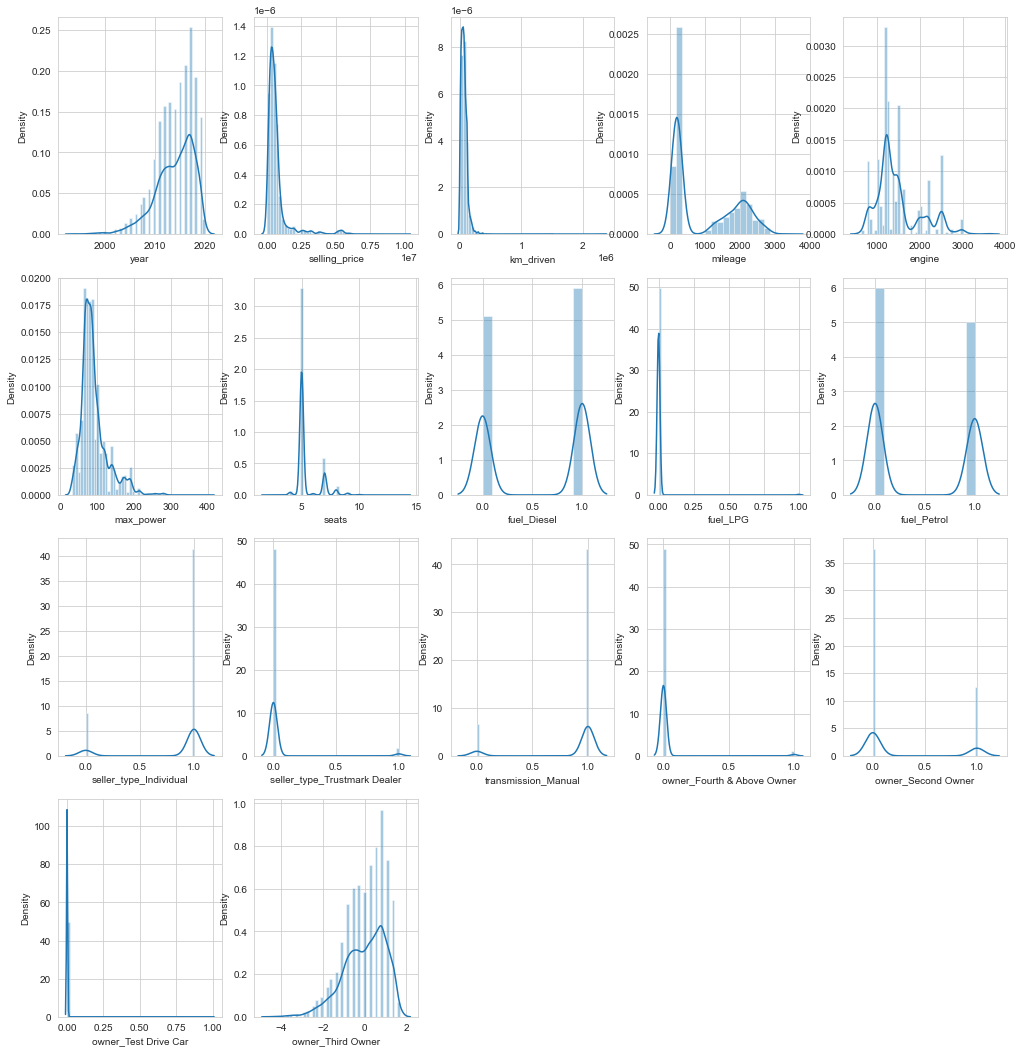

In [81]:
# Plotting the distribution of the variables (skewness) of all the columns

k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])

***Analysis:-***

- After doing the skewed data we can see the data is evenly distributed and this help is building a better model

### 12.4 Un-Skewed Data

In [82]:
X_train.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1987,2015,600000,80000.00000,1358.00000,2499,72.40000,9,1,0,0,1,0,1,0,1,0,0.22348
86,2010,225000,44000.00000,262.00000,998,58.20000,5,0,1,0,0,0,1,0,0,0,-1.09221
615,2014,380000,50000.00000,240.00000,1120,70.00000,5,1,0,0,1,0,1,0,1,0,-0.05178
1130,2005,90000,40000.00000,197.00000,796,46.30000,5,0,0,1,1,0,1,0,1,0,-2.26606
5617,2012,360000,100000.00000,2232.00000,1582,126.32000,5,1,0,0,1,0,1,0,1,0,-0.58385


### 12.5 Checking the shape of skewed dataset

In [83]:
print(X_train[cols].shape)

(8268, 17)


In [84]:
print(X_test[col].shape)

(3544,)


## 13. Feature Scaling using Standard Scaler

In [85]:
# Create list of numeric variables
scaled_vars = X_train.columns

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[scaled_vars] = scaler.fit_transform(X_train[scaled_vars])
X_test[scaled_vars] = scaler.transform(X_test[scaled_vars])

## 14. Model Building

### 14.1 Logistic Regerssion

#### 14.1.1 Building Model

In [86]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train[scaled_vars], y_train)

LogisticRegression(random_state=42)

In [87]:
rfe = RFE(logreg,step = 20)
rfe.fit(X_train[scaled_vars],y_train)

RFE(estimator=LogisticRegression(random_state=42), step=20)

In [88]:
def build_model(cols):
    
# Add a constant
    X_train_sm = sm.add_constant(X_train[cols]) 

# Create a first fitted model
    logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm1.fit()
    print(res.summary())

In [89]:
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [90]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['year', 'selling_price', 'fuel_Diesel', 'fuel_Petrol',
       'seller_type_Trustmark Dealer', 'owner_Fourth & Above Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [91]:
#Print Columns not selected by RFE. We will start with these columns for manual elimination
X_train.columns[~rfe.support_]

Index(['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'fuel_LPG',
       'seller_type_Individual', 'transmission_Manual', 'owner_Second Owner'],
      dtype='object')

In [92]:
# Taking 15 columns supported by RFE for regression
X_train_RFE = X_train[['selling_price', 'km_driven', 'max_power', 'seats', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Trustmark Dealer', 'owner_Test Drive Car']]

In [93]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['selling_price', 'km_driven', 'max_power', 'seats', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Trustmark Dealer', 'owner_Test Drive Car']
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   sold   No. Observations:                 8268
Model:                            GLM   Df Residuals:                     8259
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5710.2
Date:                Sat, 03 Sep 2022   Deviance:                       11420.
Time:                        12:52:01   Pearson chi2:                 8.26e+03
No. Iterations:                    20   Pseudo R-squ. (CS):           0.004913
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

***Analysis:-***
    
- All the p-values are now in the appropriate range

#### 14.1.2 Fitting the Model

In [94]:
# Cross Validation
scores = cross_validate(logreg, X_train[scaled_vars], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
print(f"Cross validated mean accuracy: {round(scores['test_accuracy'].mean(), 3)}")

logreg.fit(X_train[scaled_vars], y_train)
pred = logreg.predict(X_train[scaled_vars])
prob_est = logreg.predict_proba(X_train[scaled_vars])

Cross validated mean accuracy: 0.511


#### 14.1.3 Measuring Model Performance

Sensitivity (Recall): 0.40907981449841346
Specificity: 0.6408535123471589
Precision: 0.5280403276622558
F-Score: 0.4610094897538165


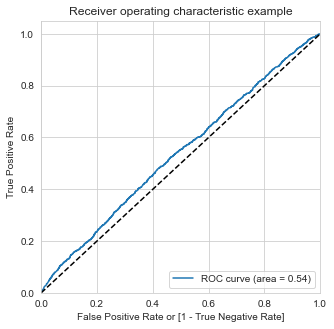

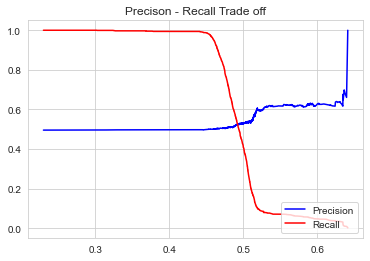

In [95]:
def draw_roc(actual_values, probability_estimates):
    fpr, tpr, thresholds = roc_curve(actual_values, probability_estimates, drop_intermediate=False)
    auc_score = roc_auc_score(actual_values, probability_estimates)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {round(auc_score, 2)})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def draw_prec_recall(actual_values, probability_estimates):
    
    p, r, thresholds = precision_recall_curve(actual_values, probability_estimates)
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "r-", label="Recall")
    plt.title("Precison - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()

def get_metrics(y, pred, prob_est):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    f = f1_score(y, pred)

    # Sensitivity, Specificity
    print(f"Sensitivity (Recall): {recall}\nSpecificity: {tn/(tn+fp)}\nPrecision: {precision}\nF-Score: {f}")

    # Reciever Operating Characteristic Curve
    draw_roc(y, prob_est[:, 1])

    # Precision Recall Curve
    draw_prec_recall(y, prob_est[:, 1])
    
get_metrics(y_train, pred, prob_est)

#### 14.1.4 Finding Optimal Cutoff

In [96]:
# Making y_train_pred_final
y_train_pred_final = pd.DataFrame({'is_fraud':y_train, 'probability': prob_est[:, 1]})
numbers = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

# Making cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.is_fraud, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensi, cutoff_df.speci], axis=0)

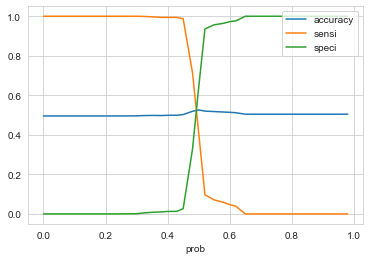

Optimum cut-off value is: 0.5


In [97]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

cutoff_value = cutoff_df.sort_values('var').head(1)['prob'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")

#### 14.1.5 Evaluating the Model on train dataset

Accuracy: 0.5260038703434929
Sensitivity (Recall): 0.40907981449841346
Specificity: 0.6408535123471589
Precision: 0.5280403276622558
F-Score: 0.4610094897538165


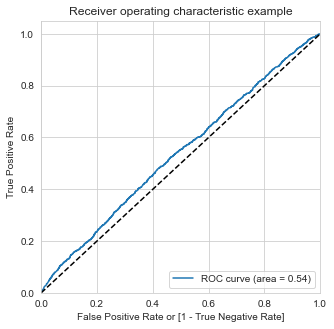

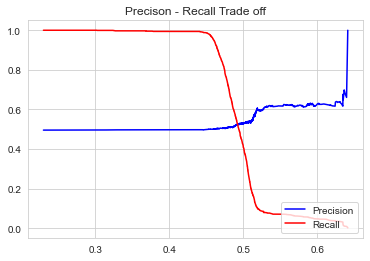

In [98]:
# new predicted values based on cut-off
pred = (logreg.predict_proba( X_train[scaled_vars])[:, 1] >= cutoff_value).astype(int)
print(f"Accuracy: {accuracy_score(y_train, pred)}")
get_metrics(y_train, pred, prob_est)

#### 14.1.6 Evaluating the Model on test dataset

accuracy:0.5378103837471784
Sensitivity (Recall): 0.5754560530679934
Specificity: 0.49855907780979825
Precision: 0.5447409733124019
F-Score: 0.5596774193548387


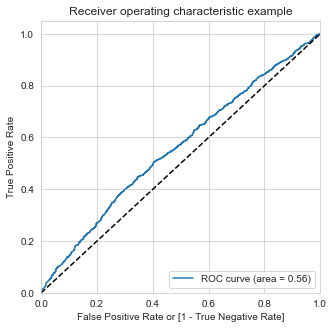

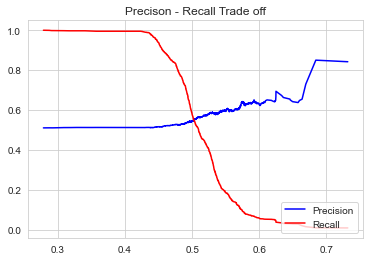

In [99]:
# Scoring against Test Set
logreg.fit(X_test[scaled_vars], y_test)
pred = (logreg.predict_proba( X_test[scaled_vars])[:, 1] >= cutoff_value).astype(int)
prob_est = logreg.predict_proba(X_test[scaled_vars])
print(f"accuracy:{accuracy_score(y_test, pred)}")
get_metrics(y_test, pred, prob_est)

### 14.2 Decission Tree

#### 14.2.1 Building the Model

In [100]:
dt = DecisionTreeClassifier(random_state=42)

In [101]:
hyper_params = [{ 'max_depth' : [2, 3, 5, 10, 20],
                  'min_samples_leaf' : [5, 10, 20, 50, 100],
                'criterion' : [ 'entropy' , 'gini' ]}]

In [102]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=hyper_params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [103]:
X_train_dt = X_train.copy()
y_train_dt = y_train.copy()

In [104]:
X_test_dt = X_test.copy()
y_test_dt = y_test.copy()

In [105]:
y_train_pred_dt = logreg.predict(X_train_dt)
y_test_pred_dt = logreg.predict(X_test_dt)

In [106]:
%%time
grid_search.fit(X_train_dt, y_train_dt)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 641 ms
Wall time: 10.5 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 5, 10, 20],
                          'min_samples_leaf': [5, 10, 20, 50, 100]}],
             scoring='accuracy', verbose=1)

In [107]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.04039,0.00806,0.00573,0.00191,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.50169,0.51379,0.49492,0.50992,0.50508,0.00731,47
1,0.02069,0.00302,0.00474,0.00192,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.50169,0.51379,0.49492,0.50992,0.50508,0.00731,47
2,0.01795,0.00346,0.00424,0.00083,entropy,2,20,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.51572,0.51476,0.49492,0.50992,0.50883,0.00833,37
3,0.02992,0.01223,0.00648,0.00229,entropy,2,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.51572,0.51379,0.49492,0.50992,0.50859,0.00816,41
4,0.03057,0.01659,0.00574,0.00311,entropy,2,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.51814,0.50556,0.49492,0.50992,0.50714,0.00838,45


In [108]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
45,0.09849,0.03009,0.00324,0.00043,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.59797,0.60861,0.62990,0.55588,0.59809,0.02695,1
20,0.10695,0.02620,0.00374,0.00130,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.58539,0.60619,0.61587,0.58297,0.59761,0.01388,2
21,0.09225,0.01618,0.00299,0.00000,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.59700,0.59748,0.61829,0.56991,0.59567,0.01718,3
46,0.08926,0.02844,0.00374,0.00083,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.58926,0.57958,0.62264,0.58684,0.59458,0.01659,4
22,0.07929,0.01643,0.00324,0.00043,entropy,20,20,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.55685,0.58974,0.59942,0.55394,0.57499,0.01992,5


In [109]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [110]:
dt_best = grid_search.best_estimator_

#### 14.2.2 Evaluating the Model on train dataset

In [111]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_dt, dt_classifier.predict(X_train_dt)))
    print("Train Precision :", precision_score(y_train_dt, dt_classifier.predict(X_train_dt)))
    print("Train Recall :", recall_score(y_train_dt, dt_classifier.predict(X_train_dt)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_dt, dt_classifier.predict(X_train)))
    print("-"*50)
evaluate_model(dt_best)


Train Accuracy : 0.7233913884857281
Train Precision : 0.7318135245901639
Train Recall : 0.6973395167195509
Train Confusion Matrix:
[[3124 1047]
 [1240 2857]]
--------------------------------------------------


#### 14.2.3 Evaluating the Model on test dataset

In [112]:
def evaluate_model(dt_classifier):
    print("Test Accuracy :", accuracy_score(y_test_dt, dt_classifier.predict(X_test_dt)))
    print("Test Precision :", precision_score(y_test_dt, dt_classifier.predict(X_test_dt)))
    print("Test Recall :", recall_score(y_test_dt, dt_classifier.predict(X_test_dt)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_dt, dt_classifier.predict(X_test)))
    print("-"*50)
evaluate_model(dt_best)

Test Accuracy : 0.6032731376975169
Test Precision : 0.620442319187089
Test Recall : 0.5737976782752903
Test Confusion Matrix:
[[1100  635]
 [ 771 1038]]
--------------------------------------------------


### 14.3 Random Forest

#### 14.3.1 Building Model 

In [113]:
rf = RandomForestClassifier(n_estimators=10,max_depth=4,max_features=5,random_state=42,oob_score=True)

In [114]:
X_train_rf = X_train.copy()
y_train_rf = y_train.copy()

In [115]:
X_test_rf = X_test.copy()
y_test_rf = y_test_dt.copy()

In [116]:
y_train_pred_rf = logreg.predict(X_train_rf)
y_test_pred_rf = logreg.predict(X_test_rf)

In [117]:
%%time
rf.fit(X_train_rf,y_train_rf)

CPU times: total: 93.8 ms
Wall time: 104 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [118]:
rf.oob_score_

0.5281809385582971

In [119]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=4, max_features=5, random_state=1608637542)

#### 14.3.2 Evaluating the Model on train dataset

In [120]:
def evaluate_model(rf_classifier):
    print("Train Accuracy :", accuracy_score(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("Train Precision :", precision_score(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("Train Recall :", recall_score(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_rf, rf_classifier.predict(X_train_rf)))
    print("-"*50)
evaluate_model(rf)

Train Accuracy : 0.5695452346395743
Train Precision : 0.5813672111312764
Train Recall : 0.4691237490846961
Train Confusion Matrix:
[[2787 1384]
 [2175 1922]]
--------------------------------------------------


#### 14.3.3 Evaluating the Model on test dataset

In [121]:
def evaluate_model(rf_classifier):
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test_rf, rf_classifier.predict(X_test_rf)))
    print("Test Precision :", precision_score(y_test_rf, rf_classifier.predict(X_test_rf)))
    print("Test Recall :", recall_score(y_test_rf, rf_classifier.predict(X_test_rf)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test_rf, rf_classifier.predict(X_test)))
evaluate_model(rf)

--------------------------------------------------
Test Accuracy : 0.5259593679458239
Test Precision : 0.545583038869258
Test Recall : 0.4267551133222775
Test Confusion Matrix:
[[1092  643]
 [1037  772]]


***Analysis:-***

- Finally, we have an overall accuracy of about 0.76 on all the Decision Tree model. That is, there is 76.3 % chance that it will give good prediction.


### 15. Merging the Train Test Dataset Before & After Model Building

### 15.1 Creating the Subset of Non- Predicted Train Dataset

In [122]:
user_car_data1['sold'] = user_car_data1['sold'].map({'Y': 1, 'N': 0})
user_car_data_merged = user_car_data1[['selling_price','sold','year']]
user_car_data_merged.head()

,selling_price,sold,year
0,450000,1,2014
1,370000,1,2014
2,158000,1,2006
3,225000,1,2010
4,130000,1,2007


### 15.2 Creating the Subset of Predicted Train Dataset

In [123]:
# Creating dataframe of y_train_pred

user_car_data_pred = pd.DataFrame(y_train_pred_dt)
user_car_data_pred.head()

,0
0,1
1,0
2,0
3,0
4,0


In [124]:
# Merging the two dataframes

user_car_data_final = pd.concat([user_car_data_merged, user_car_data_pred],axis=1)
user_car_data_final.head()

,selling_price,sold,year,0
0,450000.00000,1.00000,2014.00000,1
1,370000.00000,1.00000,2014.00000,0
2,158000.00000,1.00000,2006.00000,0
3,225000.00000,1.00000,2010.00000,0
4,130000.00000,1.00000,2007.00000,0


### 15.3 Creating Final Train Model

In [125]:
# Renaming column

user_car_data_final= user_car_data_final.rename(columns={ 0 : 'sold_pred'})
user_car_data_final['sold'] = user_car_data_final['sold'].astype(str).str.replace('.0', '', regex=False)
user_car_data_final['selling_price'] = user_car_data_final['selling_price'].astype(str).str.replace('.0', '', regex=False)
user_car_data_final.head()

,selling_price,sold,year,sold_pred
0,450000,1,2014.00000,1
1,370000,1,2014.00000,0
2,158000,1,2006.00000,0
3,225000,1,2010.00000,0
4,130000,1,2007.00000,0


### 15.4 Checking Preticed and Non-Predicted Sold Count

In [126]:
user_car_data_final.groupby('sold')['sold'].count()

sold
0      5906
1      2000
nan     362
Name: sold, dtype: int64

In [127]:
user_car_data_final.groupby('sold_pred')['sold_pred'].count()

sold_pred
0    3783
1    4485
Name: sold_pred, dtype: int64

## 16. Conclusion

***Q.2 Do you think there is a significant difference between the carsales of manual vs Automatic transmission, How can we prove or disprove this hypothesis.***

- The key difference between these two transmission models are as follows:-
  -The manual transmission requires you to do more work when the vehicle is in motion. A manual transmission allows you to       physically shift the vehicle into different gears (hence the word “manual”), using a clutch pedal and shift knob. In order to move your vehicle forward and reach higher speeds, you have to manually shift gears to get to your desired speed.Manual transmissions give you more control over the vehicle, they tend to be less expensive, can get better fuel economy.


  - An automatic transmission, on the other hand, does the grunt work for you, changing gears fluidly as you push on the gas pedal. A torque converter is attached to the drivetrain which acts like a clutch on a manual transmission.
Fluid is used to automatically lock and unlock planetary gears to shift between gear rations.
An automatic transmission are Easy to use in stop and go traffic.

***Q.3 Build a predective Model for selling_price and Identify the major impacting variables.(In Python / R ):***

   - Following three v major impacting variables:
   
    - selling_price
    - year
    - km_driven
__________________________________________________________________________________________________________________________


***Q.4 Can you suggest the major cities in which company has to concentrate to meet the sales***
-   The ompany has to concentrate on cities uch as Saint Charles,Newton,Dower where the sales count is less than 25.
__________________________________________________________________________________________________________________________


***Q.5 Business Development team assumes that east region should be our primary focus for sales.***
- As per the Data Analysis that south region should be our primary focus for sales as this region has leas sale of 1600 among all the regions.
__________________________________________________________________________________________________________________________

***Q.6 There is a relationship between mileage of the car with  sold (Y/N), if so how can we prove it.***
- The better the mileage the more the cars are sold
__________________________________________________________________________________________________________________________
